In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/trist/Downloads/diabetes_indiana.csv")

In [14]:
X = data.drop(columns=['8'])
y = data['8']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

In [29]:
svm_model = SVC()

In [33]:
svm_model.fit(X_train, y_train)

SVC()

In [32]:
y_pred = svm_model.predict(X_test)

In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[81 18]
 [19 36]]


In [34]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [35]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 0.1, 'kernel': 'linear'}


In [36]:
best_svm_model = grid_search.best_estimator_

In [18]:
y_pred2 = best_svm_model.predict(X_test)

In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[81 18]
 [19 36]]


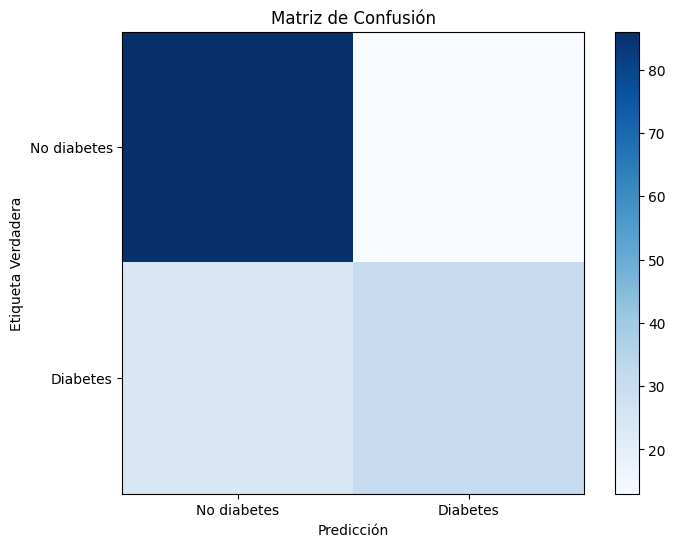

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([0, 1], ['No diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No diabetes', 'Diabetes'])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()